# Lab 07

## Zadanie 1

Przygotuj demo programu znajdującego miejsca zerowe metodą Newtona. Wykorzystując `argparse` ([link](https://docs.python.org/3.6/library/argparse.html#module-argparse)) lub `optparse` ([link](https://docs.python.org/3.6/library/optparse.html)) obsłuż:
- ustalane punktu startowego,
- wielkość kroku w pochodnej,
- ilość kroków metody,
- dokładność
- pomoc

Program uruchamiamy podając, np.:

`./newton.py x**2+x+1 -h 0.00001`

## Zadanie 2

Zadanie należy wykonać wykorzystując program `BagOfWords` z poprzednich zajęć.


Przerób ją tak, żeby interpunkcja, cyfry i wszelkie inne znaki nie przeszkadzały w parsowaniu tekstu. Uruchom ja na [tekście hamleta](http://www.gutenberg.org/cache/epub/1787/pg1787.txt). Ile razy występuje słowo hamlet? Jak brzmi 10 najczęściej występujących słów?

['i', 'ii', 'iii', 'iv', 'v']
[[235, 232, 189, 177, 121, 110, 97, 118, 84, 128, 66, 128, 81, 48, 66], [197, 189, 138, 122, 138, 120, 116, 85, 74, 64, 63, 124, 50, 54, 51], [273, 235, 174, 172, 149, 165, 127, 93, 97, 78, 81, 121, 75, 65, 73], [163, 195, 120, 108, 91, 99, 104, 74, 86, 64, 80, 69, 58, 71, 53], [407, 208, 220, 238, 126, 134, 181, 139, 88, 99, 112, 78, 87, 69, 89]]


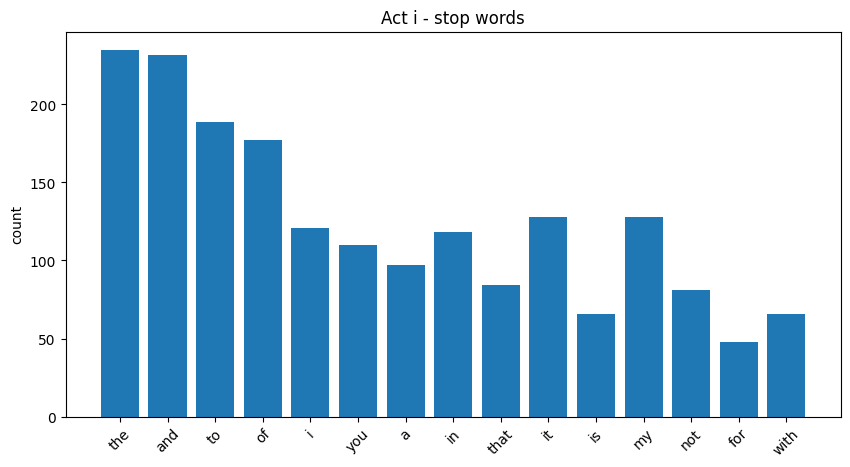

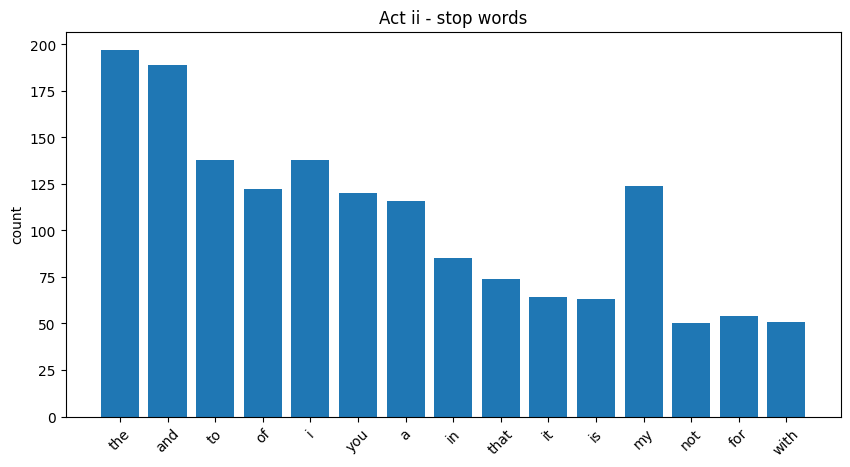

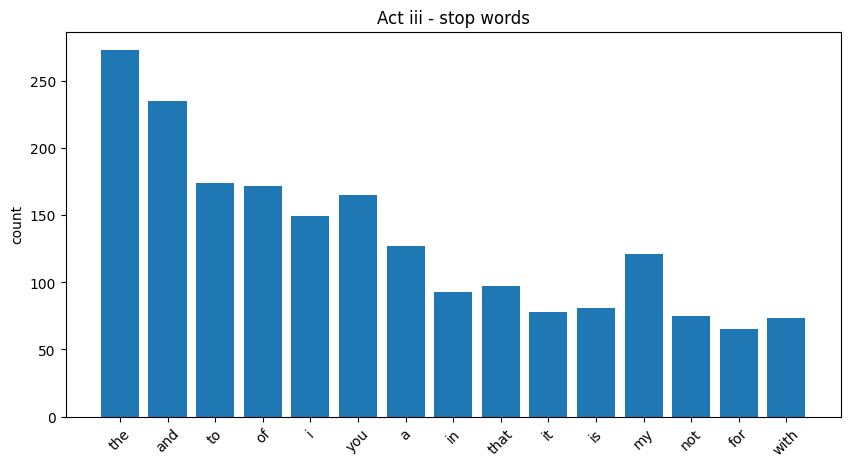

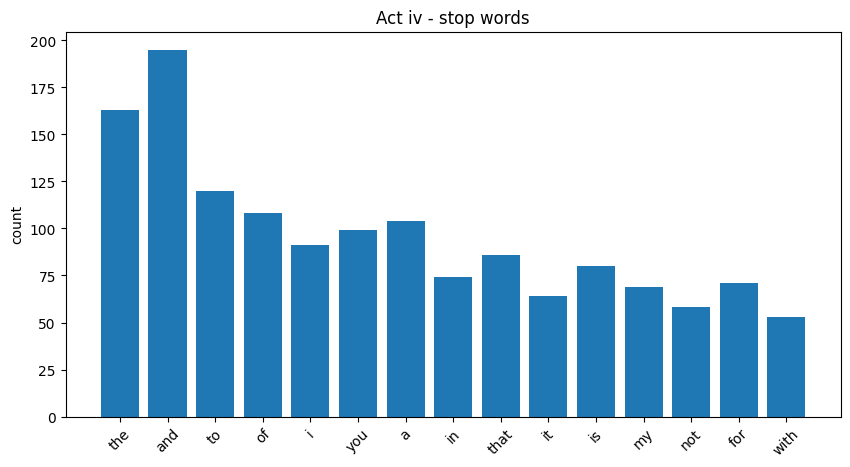

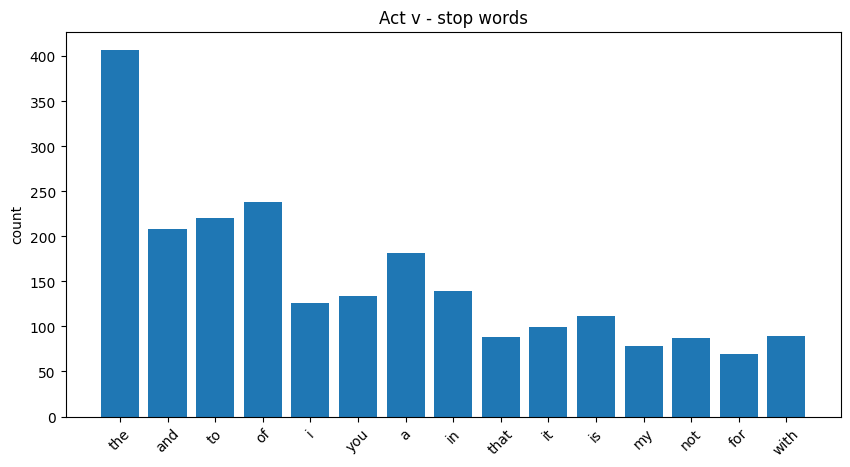

In [17]:
import requests
import matplotlib.pyplot as plt
import numpy as np

STOP_WORDS = ["the", "and", "to", "of", "i", "you", "a", "in", "that", "it", "is", "my", "not", "for", "with"]

class BagOfWords:

    def __init__(self, words):
        if hasattr(words, "read"):
            words = words.read()
        elif words.startswith("http"):
            r = requests.get(words)
            words = r.text
        words = words.lower()

        tr = str.maketrans(string.punctuation + string.digits, " "*(len(string.punctuation)+len(string.digits)))
        words = words.translate(tr)

        self._word_dict = Counter(words.split())

    def __repr__(self):
        s = ""
        i = 0
        for k, v in self._word_dict.items():
            if i != 0:
                s += ", "
            s += f"{k}:{v}"
            i += 1
        return s

    def __contains__(self, word):
        return self._word_dict.get(word.lower(), 0) > 0

    def __iter__(self):
        return (word for word, count in self._word_dict.most_common())

    def __add__(self, other):
        bag = BagOfWords("")
        bag._word_dict = self._word_dict + other._word_dict
        return bag

    def __getitem__(self, item):
        return self._word_dict[item.lower()]

    def __setitem__(self, item, value):
        self._word_dict[item.lower()] = value

    def count_stop_words(self):
        return {word: self._word_dict.get(word, 0) for word in STOP_WORDS}


def split_into_acts(text):
    acts_dict = {}
    current_act = None
    buffer = []

    for line in text.splitlines():
        line_strip = line.strip()

        if line_strip.startswith("act ") and "scene" in line_strip:

            if current_act is not None:
                acts_dict[current_act] = "\n".join(buffer)
                buffer = []

            parts = line_strip.split()
            if len(parts) >= 2:
                current_act = parts[1].replace(".", "")
            else:
                current_act = line_strip
        else:
            if current_act:
                buffer.append(line_strip)

    if current_act:
        acts_dict[current_act] = "\n".join(buffer)

    return acts_dict



url = "http://www.gutenberg.org/cache/epub/1787/pg1787.txt"
r = requests.get(url)
raw_text = r.text.lower()
acts = split_into_acts(raw_text)

act_names = []
stopword_counts = []

for act_name, act_text in acts.items():
   bag = BagOfWords(act_text)
   dict_stop_words = bag.count_stop_words()
   act_names.append(act_name)
   stopword_counts.append([dict_stop_words[word] for word in STOP_WORDS])

print(act_names)
print(stopword_counts)
stopword_counts = np.array(stopword_counts)


for i, act_name in enumerate(act_names):
    counts = stopword_counts[i]

    plt.figure(figsize=(10,5))
    plt.bar(STOP_WORDS, counts)
    plt.title(f"Act {act_name} - stop words")
    plt.ylabel("count")
    plt.xticks(rotation=45)
    plt.show()


#url = "http://www.gutenberg.org/cache/epub/1787/pg1787.txt"
#bag = BagOfWords(url)

#print("hamlet:", bag["hamlet"])

#print("10 najczesciej wystepujacych slow:")
#for word, count in bag._word_dict.most_common(10):
#    print(word, count)


## Zadanie 3

Wykorzystując `pickle` zapisz i odczytaj klasy z poprzedniego zadania nakarmonej Hamletem. Porównaj metody i rozmiar.

In [14]:
import pickle

with open("bow_hamlet.pkl", "wb") as f:
    pickle.dump(bag, f)

with open("bow_hamlet_high.pkl", "wb") as f:
    pickle.dump(bag, f, protocol=pickle.HIGHEST_PROTOCOL)

with open("bow_hamlet.pkl", "rb") as f:
    bow_loaded = pickle.load(f)

with open("bow_hamlet_high.pkl", "rb") as f:
    bow_loaded_high = pickle.load(f)

import os

size_default = os.path.getsize("bow_hamlet.pkl")
size_high = os.path.getsize("bow_hamlet_high.pkl")

print("rozmiar zwykly protokol:", size_default)
print("rozmiar high protocol:", size_high)
print("liczba slow hamlet:", bow_loaded["hamlet"])
print("liczba slow hamlet high protocol:", bow_loaded_high["hamlet"])


rozmiar zwykly protokol: 58453
rozmiar high protocol: 58453
liczba slow hamlet: 125
liczba slow hamlet high protocol: 125


## Zadanie 4

Wykorzystując [https://gist.github.com/pamelafox/986163](https://gist.github.com/pamelafox/986163) podaj aktualną godzinę we:
- wszystkich krajach, wyświetlając je zgrupowane względem kontynentów,
- przeprowadź symulacyjne wyświetlanie kolejnych krajów w miarę jak w danym kraju wybija północ, opóżnienie wyświetlania ustaw proporcjonalne do realnego czasu

In [16]:
from country_info import countries
from datetime import datetime
from zoneinfo import ZoneInfo

by_continent = {}
for c in countries:
    continent = c['continent']
    by_continent.setdefault(continent, []).append(c)

def current_time_in_zone(tz_name):
    tz = ZoneInfo(tz_name)
    return datetime.now(tz)

for continent, country_list in by_continent.items():
    print(f"### {continent}")
    for c in country_list:
        name = c['name']
        code = c['code']
        zones = c['timezones']
        times = [current_time_in_zone(z) for z in zones]
        times_str = ", ".join(f"{t.strftime('%Y-%m-%d %H:%M:%S')} ({z})" for t, z in zip(times, zones))
        print(f"{name} ({code}): {times_str}")
    print()


### Europe
Andorra (AD): 2025-11-23 22:21:42 (Europe/Andorra)
Albania (AL): 2025-11-23 22:21:42 (Europe/Tirane)
Austria (AT): 2025-11-23 22:21:42 (Europe/Vienna)
Belgium (BE): 2025-11-23 22:21:42 (Europe/Brussels)
Bulgaria (BG): 2025-11-23 23:21:42 (Europe/Sofia)
Belarus (BY): 2025-11-24 00:21:42 (Europe/Minsk)
Czech Republic (CZ): 2025-11-23 22:21:42 (Europe/Prague)
Germany (DE): 2025-11-23 22:21:42 (Europe/Berlin)
Denmark (DK): 2025-11-23 22:21:42 (Europe/Copenhagen)
Estonia (EE): 2025-11-23 23:21:42 (Europe/Tallinn)
Finland (FI): 2025-11-23 23:21:42 (Europe/Helsinki)
France (FR): 2025-11-23 22:21:42 (Europe/Paris)
Greece (GR): 2025-11-23 23:21:42 (Europe/Athens)
Hungary (HU): 2025-11-23 22:21:42 (Europe/Budapest)
Republic of Ireland (IE): 2025-11-23 21:21:42 (Europe/Dublin)
Iceland (IS): 2025-11-23 21:21:42 (Atlantic/Reykjavik)
Italy (IT): 2025-11-23 22:21:42 (Europe/Rome)
Liechtenstein (LI): 2025-11-23 22:21:42 (Europe/Vaduz)
Lithuania (LT): 2025-11-23 23:21:42 (Europe/Vilnius)
Lux

## Zadanie 5

Dla klasy `BagOfWords` napisz metody `save` oraz `load` wykorzystujące `json`'a do zapisu i odczytu danych.

In [20]:
import json
from collections import Counter
import string
import requests

class BagOfWords:

    def __init__(self, words):
        if isinstance(words, dict):
            self._word_dict = Counter(words)
            return
        if hasattr(words, "read"):
            words = words.read()
        elif isinstance(words, str) and words.startswith("http"):
            words = requests.get(words).text

        words = words.lower()
        tr = str.maketrans(string.punctuation + string.digits,
                           " " * (len(string.punctuation) + len(string.digits)))
        words = words.translate(tr)

        self._word_dict = Counter(words.split())

    def __repr__(self):
        s = ""
        i = 0
        for k, v in self._word_dict.items():
            if i != 0:
                s += ", "
            s += f"{k}:{v}"
            i += 1
        return s

    def __contains__(self, word):
        return self._word_dict.get(word.lower(), 0) > 0

    def __iter__(self):
        return (word for word, count in self._word_dict.most_common())

    def __add__(self, other):
        bag = BagOfWords("")
        bag._word_dict = self._word_dict + other._word_dict
        return bag

    def __getitem__(self, item):
        return self._word_dict[item.lower()]

    def __setitem__(self, item, value):
        self._word_dict[item.lower()] = value

    def save(self, filename):
        with open(filename, "w", encoding="utf-8") as f:
            json.dump(self._word_dict, f, ensure_ascii=False, indent=2)

    @classmethod
    def load(cls, filename):
        with open(filename, "r", encoding="utf-8") as f:
            data = json.load(f)
        return cls(data)


url = "http://www.gutenberg.org/cache/epub/1787/pg1787.txt"
bag = BagOfWords(url)

print("hamlet wystepuje:", bag["hamlet"], "razy")

print("10 najczęściej występujących słów:")
for word, count in bag._word_dict.most_common(10):
    print(word, count)


bag.save("hamlet.json")
loaded = BagOfWords.load("hamlet.json")
print("read json:", loaded["hamlet"])


hamlet wystepuje: 125 razy
10 najczęściej występujących słów:
the 1348
and 1106
to 888
of 887
you 664
a 646
i 631
in 520
my 520
it 447
read json: 125
